## Differential corrector demo for LSST heliolinc3d output

Inputs:
- observations.csv contains the dfObs dataframe used in the HelioLinC3D_demo.ipynb notebook on the LSST github's heliolinc2 repo (https://github.com/lsst-dm/heliolinc2)
- clusters.csv contains the dedupe dataframe output by the HelioLinC3D_demo.ipynb notebook on the LSST github's heliolinc2 repo (https://github.com/lsst-dm/heliolinc2)

#### Create observation array for desired cluster

In [1]:
import pandas as pd
import numpy as np
np.set_printoptions(linewidth=np.inf)

obsDF = pd.read_csv('inputs/observations.csv')
clstrDF = pd.read_csv('inputs/clusters.csv')

In [2]:
obsDF.head()

,Unnamed: 0,ObjID,FieldID,FieldMJD,AstRange(km),AstRangeRate(km/s),AstRA(deg),AstRARate(deg/day),AstDec(deg),AstDecRate(deg/day),...,SNR,AstrometricSigma(deg),MaginFilter,dmagDetect,AstRATrue(deg),AstDecTrue(deg),filter,class,obsName,obsId
0,0,S1005zBsa,322,59854.134964,3.903528e+08,18.438325,317.007162,-0.012928,-5.883793,-0.034805,...,15.131873,0.000012,20.706603,0.000562,317.007156,-5.883805,y,MBA,956799,0
1,1,S1004jwpa,323,59854.135412,3.213015e+08,17.699507,317.117346,-0.022249,-7.889578,-0.014036,...,21.476082,0.000009,20.411576,0.000289,317.117350,-7.889574,y,MBA,730551,1
2,2,S100d9mta,323,59854.135412,1.776728e+08,13.421910,317.269331,0.052952,-7.615268,0.072727,...,9.683597,0.000018,21.262543,0.003400,317.269335,-7.615288,y,MBA,2930217,2
3,3,S1008iFAa,323,59854.135412,3.466097e+08,15.576340,317.619736,-0.057787,-7.693811,-0.057932,...,14.401410,0.000012,20.672152,0.002806,317.619753,-7.693808,y,MBA,2971548,3
4,4,S10083vXa,323,59854.135412,2.432820e+08,15.256792,317.376144,0.034902,-7.314139,-0.091219,...,21.406557,0.000009,20.331998,0.004021,317.376134,-7.314126,y,MBA,2937313,4


In [3]:
clstrDF.head()

,Unnamed: 0,clusterId,obsId,trailId,r,drdt,cluster_epoch,x_ecl,y_ecl,z_ecl,vx_ecl,vy_ecl,vz_ecl,var_pos,var_vel,cluster_Id
0,0,3900,[ 2 59 693 1286 1656 1993 2363 27...,-1,2.2,-0.005,59862.067573,2.071965,-0.703196,0.227554,0.000146,0.016748,0.001647,1.245471e-07,3.132513e-09,0
1,1,3,[ 9 72 521 690 827 1362 1930 26...,-1,2.0,-0.006,59862.067573,1.915666,-0.547709,0.172322,-0.000847,0.018465,-0.002026,5.087235e-07,9.791802e-09,1
2,2,71043,[ 0 39 141 248 762 1140 1521 2340],-1,3.6,0.002,59862.067573,3.135354,-1.694481,0.510152,0.006237,0.007365,0.000792,1.513550e-07,2.514341e-09,2
3,3,26520,[ 1 70 2800 3465 5031 5101 5476 6787 7806],-1,2.8,0.004,59862.067573,2.528374,-1.164562,0.302156,0.007217,0.006441,0.001763,1.892683e-08,8.907136e-10,3
4,4,9936,[ 2 59 693 1286 1656 1993 2363],-1,2.4,-0.001,59862.067573,2.231005,-0.847060,0.260739,0.003962,0.013576,0.002578,1.304467e-07,2.067539e-09,4


Right now, each entry in the obsID column of clstr is a string, but it is supposed to be a list. So, let's convert...

In [4]:
for i, obsSet in enumerate(clstrDF['obsId']):
    obsSetRemovedChars = obsSet.replace('\n', '').replace('[', '').replace(']', '').split(' ')
    clstrDF['obsId'][i] = [int(obs) for obs in obsSetRemovedChars if obs]

/var/folders/v0/kyfj1xvn1fxfw0l5zbfj7tt40000gn/T/ipykernel_49306/3676861974.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clstrDF['obsId'][i] = [int(obs) for obs in obsSetRemovedChars if obs]


In [5]:
clstrDF.head()

,Unnamed: 0,clusterId,obsId,trailId,r,drdt,cluster_epoch,x_ecl,y_ecl,z_ecl,vx_ecl,vy_ecl,vz_ecl,var_pos,var_vel,cluster_Id
0,0,3900,"[2, 59, 693, 1286, 1656, 1993, 2363, 2713, 348...",-1,2.2,-0.005,59862.067573,2.071965,-0.703196,0.227554,0.000146,0.016748,0.001647,1.245471e-07,3.132513e-09,0
1,1,3,"[9, 72, 521, 690, 827, 1362, 1930, 2653, 3481,...",-1,2.0,-0.006,59862.067573,1.915666,-0.547709,0.172322,-0.000847,0.018465,-0.002026,5.087235e-07,9.791802e-09,1
2,2,71043,"[0, 39, 141, 248, 762, 1140, 1521, 2340]",-1,3.6,0.002,59862.067573,3.135354,-1.694481,0.510152,0.006237,0.007365,0.000792,1.513550e-07,2.514341e-09,2
3,3,26520,"[1, 70, 2800, 3465, 5031, 5101, 5476, 6787, 7806]",-1,2.8,0.004,59862.067573,2.528374,-1.164562,0.302156,0.007217,0.006441,0.001763,1.892683e-08,8.907136e-10,3
4,4,9936,"[2, 59, 693, 1286, 1656, 1993, 2363]",-1,2.4,-0.001,59862.067573,2.231005,-0.847060,0.260739,0.003962,0.013576,0.002578,1.304467e-07,2.067539e-09,4


In [6]:
clusterNumber = 0 # np.random.randint(0, len(clstrDF))
data = clstrDF.iloc[clusterNumber]
fitTime = float(data['cluster_epoch']) # epoch for orbit determination
fitGuess = np.array([float(data['x_ecl']), float(data['y_ecl']), float(data['z_ecl']), float(data['vx_ecl']), float(data['vy_ecl']), float(data['vz_ecl'])]) # initial guess for orbit determination
print(data)

obsArray = np.zeros((len(data['obsId']), 5))
for i, obs in enumerate(data['obsId']):
    rawObsData = obsDF.loc[obsDF['obsId']==obs]
    time = float(rawObsData['FieldMJD'])
    ra = np.deg2rad(float(rawObsData['AstRA(deg)']))
    dec = np.deg2rad(float(rawObsData['AstDec(deg)']))
    raSigma = np.deg2rad(float(rawObsData['AstrometricSigma(deg)']))
    decSigma = np.deg2rad(float(rawObsData['AstrometricSigma(deg)']))
    obsArray[i,:] = (time, ra, dec, raSigma, decSigma)
print(obsArray)

Unnamed: 0                                                       0
clusterId                                                     3900
obsId            [2, 59, 693, 1286, 1656, 1993, 2363, 2713, 348...
trailId                                                         -1
r                                                              2.2
drdt                                                        -0.005
cluster_epoch                                         59862.067573
x_ecl                                                     2.071965
y_ecl                                                    -0.703196
z_ecl                                                     0.227554
vx_ecl                                                    0.000146
vy_ecl                                                    0.016748
vz_ecl                                                    0.001647
var_pos                                                        0.0
var_vel                                                       

#### Run differential corrector to get orbit mean state and covariance

In [7]:
from modules.helper_funcs import *
import matplotlib.pyplot as plt

In [8]:
epoch = fitTime
x_nom = fitGuess.copy()
obs_array = obsArray.copy()

n_iter = 7
rms_rad = np.zeros((n_iter,1))
rms = np.zeros((n_iter,1))
del_rms = np.zeros((n_iter,1))
state_arr = np.zeros((len(x_nom), n_iter))
for i in range(n_iter):
    P, at_w_b, b_accum = accumulate_observations_efficiently(epoch, x_nom, obs_array)
    delta_x = P@at_w_b
    x_nom += delta_x.T[0]
    state_arr[:,i] = x_nom.T
    rms_rad[i] = np.sqrt(np.sum(b_accum)/(2*len(obs_array[:,0])))
    rms[i] = np.rad2deg(rms_rad[i])*3600 # convert to ArcSec
# end for
for i in range(1, n_iter):
    del_rms[i] = abs(rms[i-1] - rms[i])/rms[i-1]
# end for
r_epoch = x_nom[:3] # differentially corrected position at epoch
v_epoch = x_nom[3:6] # differentially corrected velocity at epoch
variance = np.diag(P) # calculate the variance of the nominal state elements
st_dev = np.sqrt(variance) # calculate the standard deviation of the nominal state elements
[values,vectors] = np.linalg.eig(P) # calculate eigenvalues and eigenvectors of covariance matrix for error ellipsoid

print(x_nom)
print(st_dev[:3]*au2km)
print(st_dev[3:6]*au2km/day2sec)

[ 1.87554508 -0.54221479  0.19095079  0.00312979  0.0133597   0.00209126]
[16649.25954402 14830.8316762   3420.29238199]
[0.0038142  0.00416784 0.00069178]


In [9]:
P

array([[ 1.23862267e-08, -1.10334013e-08,  2.54452346e-09, -2.02646509e-10,  2.36897966e-10, -3.45262142e-11],
       [-1.10334013e-08,  9.82834035e-09, -2.26660996e-09,  1.80602734e-10, -2.11104629e-10,  3.07733501e-11],
       [ 2.54452346e-09, -2.26660996e-09,  5.22727854e-10, -4.16189432e-11,  4.86562865e-11, -7.09037221e-12],
       [-2.02646509e-10,  1.80602734e-10, -4.16189432e-11,  4.85269568e-12, -5.26932587e-12,  8.76789406e-13],
       [ 2.36897966e-10, -2.11104629e-10,  4.86562865e-11, -5.26932587e-12,  5.79428122e-12, -9.43114249e-13],
       [-3.45262142e-11,  3.07733501e-11, -7.09037221e-12,  8.76789406e-13, -9.43114249e-13,  1.59628724e-13]])

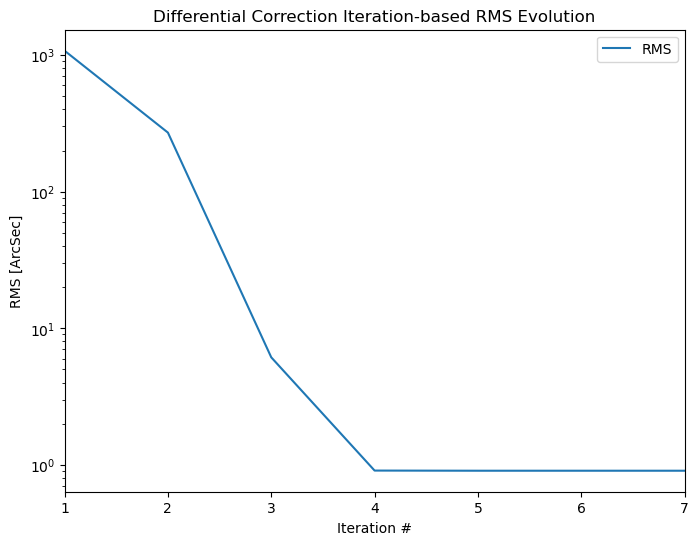

In [10]:
plt.figure(figsize=(8,6), dpi=100)
plt.semilogy(np.arange(1,n_iter+1), rms, label = 'RMS')
plt.xlabel('Iteration #')
plt.xticks(np.arange(1,n_iter+1))
plt.xlim(1, n_iter)
plt.ylabel('RMS [ArcSec]')
plt.title('Differential Correction Iteration-based RMS Evolution')
plt.legend()
plt.show()